<a href="https://colab.research.google.com/github/lokeshbaranwal/Pose-Estimation-of-Satellite/blob/master/Final_of_SpeedvL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:

dataset_root="/content/gdrive/My Drive/speed"
import pandas as pd
import os
import json
import numpy as np
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense,Flatten,Activation
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
with open(os.path.join(dataset_root,'train.json'),'r') as train:
  train_json=json.load(train)
train_json[0]['q_vbs2tango']
#len(train_json)
#train_json
# q=train_json[i]['q_vbs2tango']
# r=train_json[i]['r_Vo2To_vbs_true']
# a=q.extend(r)


[-0.419541, -0.484436, -0.214179, 0.73718]

In [0]:
imgname_list=[]
for i in range(len(train_json)):
  imgname_list.append(train_json[i]['filename'])

#imgname_list

In [0]:
label_list=[]
q1,q2,q3,q4,r1,r2,r3=[],[],[],[],[],[],[]
for i in range(len(train_json)):
  q1.append(train_json[i]['q_vbs2tango'][0])
  q2.append(train_json[i]['q_vbs2tango'][1])
  q3.append(train_json[i]['q_vbs2tango'][2])
  q4.append(train_json[i]['q_vbs2tango'][3])
  r1.append(train_json[i]['r_Vo2To_vbs_true'][0])
  r2.append(train_json[i]['r_Vo2To_vbs_true'][1])
  r3.append(train_json[i]['r_Vo2To_vbs_true'][2])
  #q.extend(r)
  #label_list.append(q)
#label_list


In [6]:
col_dict={'image_names':imgname_list,'q1':q1,'q2':q2,'q3':q3,'q4':q4,'r1':r1,'r2':r2,'r3':r3}
df=pd.DataFrame(col_dict)
#df['labels']=label_list
df_train,df_test=train_test_split(df,test_size=0.2)
len(df_test)


2400

In [7]:
path="/content/gdrive/My Drive/speed/images/train"
cols=['q1','q2','q3','q4','r1','r2','r3']
datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=datagen.flow_from_dataframe(df_train,directory=path,x_col='image_names',y_col=cols,class_mode='other',target_size=(224,224),batch_size=32,color_mode='rgb')
validation_generator=datagen.flow_from_dataframe(df_test,directory=path,x_col='image_names',y_col=cols,class_mode='other',target_size=(224,224),batch_size=32,color_mode='rgb')


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 2 invalid image filename(s) in x_col="image_names". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 9598 validated image filenames.
Found 2400 validated image filenames.


In [8]:
#Building our model using Transfer Learning
tensorflow.keras.backend.set_learning_phase(0)
model_pretrained=ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)
tensorflow.keras.backend.set_learning_phase(1)
x=model_pretrained.output
#x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(7,activation='linear')(x)

model=Model(inputs=model_pretrained.input,outputs=x)

# model.fit_generator(train_generator,steps_per_epoch=step_size_train,validation_data=validation_generator,validation_steps=step_size_valid,epochs=20)


W0724 08:58:26.741381 139984114698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 08:58:26.743218 139984114698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 08:58:26.760863 139984114698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0724 08:58:26.811087 139984114698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 08:58:26.812530

94658560/94653016 [==============================] - 1s 0us/step


In [0]:
# for i,j in enumerate(model.layers):
#   print(i,':',j)
# for layer in model.layers[:175]:
#   layer.trainable=False
# for layer in model.layers[175:]:
#   layer.trainable=True

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error') #,metrics=['mse']

step_size_train=train_generator.n//train_generator.batch_size #It should typically be equal to the number of samples of your dataset divided by the batch size.
step_size_valid=validation_generator.n//validation_generator.batch_size

W0724 08:58:41.038415 139984114698112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
history = model.fit_generator(train_generator,steps_per_epoch=step_size_train,validation_data=validation_generator,validation_steps=step_size_valid,epochs=100)


Epoch 1/100
299/299 [==============================] - 4189s 14s/step - loss: 6.1544 - val_loss: 4.3176
Epoch 2/100
299/299 [==============================] - 350s 1s/step - loss: 1.2020 - val_loss: 1.5311
Epoch 3/100
299/299 [==============================] - 340s 1s/step - loss: 0.8419 - val_loss: 0.9665
Epoch 4/100
299/299 [==============================] - 337s 1s/step - loss: 0.6200 - val_loss: 0.8741
Epoch 5/100
299/299 [==============================] - 329s 1s/step - loss: 0.5711 - val_loss: 1.5926
Epoch 6/100
299/299 [==============================] - 341s 1s/step - loss: 0.4279 - val_loss: 1.0825
Epoch 7/100
299/299 [==============================] - 343s 1s/step - loss: 0.4289 - val_loss: 1.2178
Epoch 8/100
299/299 [==============================] - 342s 1s/step - loss: 0.4184 - val_loss: 0.9343
Epoch 9/100
299/299 [==============================] - 343s 1s/step - loss: 0.3929 - val_loss: 0.9904
Epoch 10/100
299/299 [==============================] - 344s 1s/step - loss: 0.3

In [0]:
# label_list=[]
# q1,q2,q3,q4,r1,r2,r3=[],[],[],[],[],[],[]
# for i in range(len(real_json)):
#   q1.append(real_json[i]['q_vbs2tango'][0])
#   q2.append(real_json[i]['q_vbs2tango'][1])
#   q3.append(real_json[i]['q_vbs2tango'][2])
#   q4.append(real_json[i]['q_vbs2tango'][3])
#   r1.append(real_json[i]['r_Vo2To_vbs_true'][0])
#   r2.append(real_json[i]['r_Vo2To_vbs_true'][1])
#   r3.append(real_json[i]['r_Vo2To_vbs_true'][2])

In [0]:
# test_datagen=ImageDataGenerator(rescale=1./255.)
# test_generator=test_datagen.flow_from_dataframe(dataframe=testdf,directory="./test/",x_col="id",y_col=None,batch_size=32,seed=42,shuffle=False,class_mode=None,target_size=(32,32))

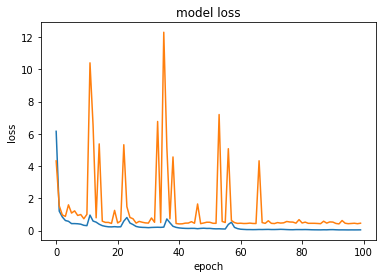

In [15]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [16]:
# #Evaluating the model on Synthetic image
# test_result=[]
# with open(os.path.join(dataset_root,'test.json'),'r') as f_eval:
#   test_list=json.load(f_eval)

# for img in test_list:
#   img_path=os.path.join(dataset_root,'images','test',img['filename'])
#   img_arr=image.load_img(img_path,target_size=(224,224))
#   x=image.img_to_array(img_arr)
#   x=preprocess_input(x)
#   x=np.expand_dims(x,axis=0)
#   output=model.predict(x)
#   test_result.append({'filename':img['filename'],'q':output[:4],'r':output[4:]}) 
  
  
#Evaluating the model
test_result=[]
q_est,r_est=[],[]
with open(os.path.join(dataset_root,'real.json'),'r') as f_eval:
  test_list=json.load(f_eval)

for img in test_list:
  img_path=os.path.join(dataset_root,'images','real',img['filename'])
  img_arr=image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img_arr)
  x=preprocess_input(x)
  x=np.expand_dims(x,axis=0)
  output=model.predict(x)
  output=output.tolist()
  test_result.append({'filename':img['filename'],'q':output[:4],'r':output[4:]})
  q_est.append(output[0][:4])
  r_est.append(output[0][4:])
  print(output)

[[-0.40418392419815063, -0.22893975675106049, -0.17379428446292877, -0.04722781479358673, 0.1627606749534607, 0.03327885642647743, 5.12816047668457]]
[[0.0549222007393837, 0.1314745992422104, -0.21536195278167725, -0.026365041732788086, -0.01674959808588028, -0.1818162053823471, 4.932540416717529]]
[[0.2311042696237564, -0.17656497657299042, -0.3021416664123535, 0.10310329496860504, -0.1777907758951187, -0.0973181203007698, 5.672935962677002]]
[[0.5005431771278381, 0.1224028691649437, -0.43007078766822815, -0.31525537371635437, 0.2711838185787201, -0.04407721385359764, 16.813438415527344]]
[[0.3860761821269989, -0.3445126712322235, -0.04966200888156891, -0.0326576791703701, -0.10436492413282394, -0.3720170259475708, 5.503108501434326]]


In [0]:
# #Evaluating the model on Synthetic image
# img_path=os.path.join(dataset_root,'images','test','img000014.jpg')
# img_arr=image.load_img(img_path,target_size=(224,224))
# x=image.img_to_array(img_arr)
# x=preprocess_input(x)
# x=np.expand_dims(x,axis=0)
# output=model.predict(x)
# output

In [0]:
# img_path=os.path.join(dataset_root,'images','real','img000187real.jpg')
# img_arr=image.load_img(img_path,target_size=(224,224))
# x=image.img_to_array(img_arr)
# x=preprocess_input(x)
# x=np.expand_dims(x,axis=0)
# output=model.predict(x)
# output

In [0]:
# #Manual Calculation
# #rgt for attitude ground truth value of image
# #rest for attitude estimated value of image
# rgt =3.3147212478
# rest =3.9225399824


In [0]:
# t=LA.norm([rgt-rest],2)/LA.norm([rgt],2)

In [0]:
# t #position_score for image 'img000187real.jpg'

In [0]:
real_json=[]
q_gt,r_gt=[],[]
with open(os.path.join(dataset_root,'real.json'),'r') as f:
  real_json=json.load(f)
for i in range(len(real_json)):
  q_gt.append(real_json[i]['q_vbs2tango'])
  r_gt.append(real_json[i]['r_Vo2To_vbs_true'])

In [22]:
import math
score_orientation=0
bra_ket=[]
for i in range(len(real_json)):
  bra_ket.append(q_est[i][0]*q_gt[i][0]+q_est[i][1]*q_gt[i][1]+q_est[i][2]*q_gt[i][2]+q_est[i][3]*q_gt[i][3])
  
  
for i in range(len(real_json)):
  if bra_ket[i]<1:
    score_orientation+=2*math.acos(bra_ket[i])
score_orientation


15.471092171206525

In [23]:
from numpy import linalg
score_position=0
for i in range(len(real_json)):
   score_position+=(abs(linalg.norm([r_gt[i]],2)-linalg.norm([r_est[i]],2))/linalg.norm([r_gt[i]],2))

#linalg.norm([r_gt[0]])
score_position

4.851159499970017

In [24]:
score=(score_orientation+score_position)/len(real_json)
score

4.064450334235309